Three main non-positional encodings stand out: shape, size, and color. For Matplotlib and Seaborn, color is the easiest of these three encodings to apply for a third variable. Color can be used to encode both qualitative and quantitative data, with different types of color palettes used for different use cases. Because of how broadly color can be used, a dedicated discussion of color and its use in Matplotlib and Seaborn will be deferred to the next page in the lesson.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [3]:
print(fuel_econ.shape)
fuel_econ.head()

(3929, 21)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


In [4]:
# Data type change from 'string' to 'category'

print(fuel_econ.VClass.dtype)

sedan_classes = [
    'Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars',
    'Large Cares'
]

vclasses = pd.api.types.CategoricalDtype(ordered=True,
                                         categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

print(fuel_econ.VClass.dtype)

object
category


In [5]:
fuel_econ.shape[0]

3929

In [6]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=False)
sample

array([ 872, 1663, 2428, 1180,  853, 2052, 2184,  145, 2789, 1936,  885,
       1241, 2744, 1172, 1925, 3871, 1775, 1591, 3021,  353, 1292, 1245,
       1828,    3,  351,  272, 3790,  285, 2097, 3363, 3803, 2537, 1283,
        926, 2595, 2485,  206, 1894, 2437, 2790, 2019, 1491,  810, 1552,
       3356, 1406, 2255,  181, 3481, 3453, 1650, 2445, 2911,  339, 2060,
       2556, 2100,  820, 2438, 3526, 1916, 2043,   89, 1339, 1088, 2665,
       3805, 3359, 3839, 2945, 3376, 3024, 3617,  197, 2153, 2594, 2584,
       1058, 2170, 2772,  384, 2247, 2887, 1691, 1867,  527, 3683, 3096,
       3891, 3890,  365, 1868, 3777, 2694, 1077, 1154, 2417, 2260,  821,
        594, 3482, 1528,  694, 1521, 3117,  190,  567,  236, 1878, 1698,
       2209, 1000,  785, 2115, 2223, 3418,  282, 3917, 2832,  860, 2346,
        284, 3425, 3441, 3445, 3769, 1398,  143, 2924, 3836, 1086, 3109,
        695, 2993, 1376, 1645, 1604, 3470, 2749, 2109, 2490,  654, 2119,
       3365, 2249,   91, 3057,  307, 1780, 2568, 26

In [7]:
# pick ramdomly chosen sample of 200     # fuel_econ.sample(200)

fuel_econ_subset = fuel_econ.loc[sample]
fuel_econ_subset.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
872,33923,Subaru,Impreza AWD,2014,Compact Cars,All-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.5,...,96,16.7674,20.8845,22.5537,31.4599,18.9559,468,4,4,Manual
1663,35337,Hyundai,Veloster,2015,Compact Cars,Front-Wheel Drive,Manual 6-spd,Regular Gasoline,4,1.6,...,90,25.9773,33.7198,34.1136,49.5544,29.1006,301,7,7,Manual
2428,36881,Ford,Mustang,2016,Subcompact Cars,Rear-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.7,...,0,18.7011,23.4925,27.3436,38.7800,21.8020,410,5,5,Automatic
1180,34466,Porsche,911 Targa 4,2014,Minicompact Cars,4-Wheel Drive,Manual 7-spd,Premium Gasoline,6,3.4,...,0,18.3385,23.0000,25.8687,36.5000,21.1028,422,5,5,Manual
853,33852,Cadillac,XTS AWD,2014,NaN,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,104,15.9536,19.8000,23.7068,33.2000,18.7067,475,4,4,Automatic


<AxesSubplot:xlabel='displ', ylabel='comb'>

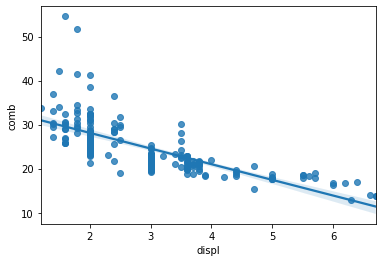

In [8]:
sb.regplot(data=fuel_econ_subset, x='displ', y='comb')

<AxesSubplot:xlabel='displ', ylabel='comb'>

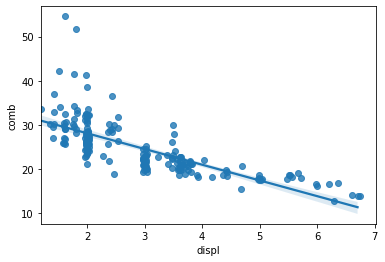

In [9]:
sb.regplot(data=fuel_econ_subset, x='displ', y='comb', x_jitter=0.04)

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

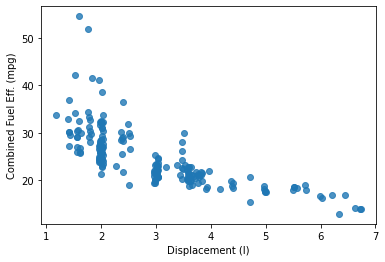

In [10]:
sb.regplot(data=fuel_econ_subset,
           x='displ',
           y='comb',
           x_jitter=0.04,
           fit_reg=False)

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Shape, Color, Size as 3rd variable (non-positional encodings)

- Make a shape per categorical value - tran

In [11]:
fuel_econ_subset.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
872,33923,Subaru,Impreza AWD,2014,Compact Cars,All-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.5,...,96,16.7674,20.8845,22.5537,31.4599,18.9559,468,4,4,Manual
1663,35337,Hyundai,Veloster,2015,Compact Cars,Front-Wheel Drive,Manual 6-spd,Regular Gasoline,4,1.6,...,90,25.9773,33.7198,34.1136,49.5544,29.1006,301,7,7,Manual
2428,36881,Ford,Mustang,2016,Subcompact Cars,Rear-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.7,...,0,18.7011,23.4925,27.3436,38.7800,21.8020,410,5,5,Automatic
1180,34466,Porsche,911 Targa 4,2014,Minicompact Cars,4-Wheel Drive,Manual 7-spd,Premium Gasoline,6,3.4,...,0,18.3385,23.0000,25.8687,36.5000,21.1028,422,5,5,Manual
853,33852,Cadillac,XTS AWD,2014,NaN,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,104,15.9536,19.8000,23.7068,33.2000,18.7067,475,4,4,Automatic


## Shape (categorical) - transmission type

Shape is a good encoding for categorical variables, using one shape for each level of the categorical variable. Unfortunately, there is no built-in way to automatically assign different shapes in a single call of the `scatter` or `regplot` function. Instead, we need to write a loop to call our plotting function multiple times, isolating data points by categorical level and setting a different "marker" argument value for each one.

https://matplotlib.org/stable/api/markers_api.html

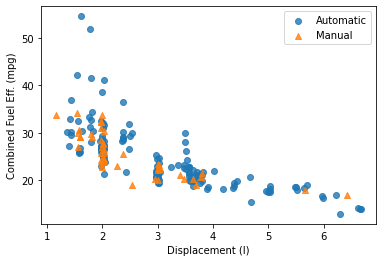

In [12]:
# Make a list of lists rather than dictionary so that we can have finer control of the order in which the levels are plotted.

ttype_markers = [['Automatic', 'o'], ['Manual', '^']]  

# for more shapes => https://matplotlib.org/stable/api/markers_api.html 
# input each variable of lists

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]  # loop matchs 'fuel_econ.tran' with 'ttype'
    sb.regplot(data=plot_data,
               x='displ',
               y='comb',
               x_jitter=0.04,
               fit_reg=False,
               marker=marker)

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic', 'Manual'])
# Add legend, one for each regplot call

([], [])

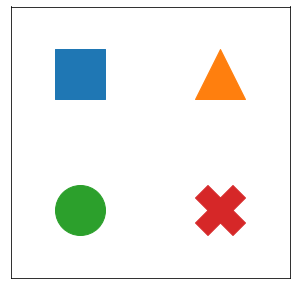

In [13]:
plt.figure(figsize=[5, 5])

common_size = 2500
plt.scatter([0], [1], marker='s', s=common_size)
plt.scatter([1], [1], marker='^', s=common_size)
plt.scatter([0], [0], marker='o', s=common_size)
plt.scatter([1], [0], marker='X', s=common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5, 1.5)
plt.xticks([])
plt.ylim(-0.5, 1.5)
plt.yticks([])

Despite having the same "s" values, the triangle, circle, and X markers all **look smaller** (have a smaller area) than the square. Perhaps this isn't a major concern, considering that size is better used as a qualitative measure for exploration. But it's still something to consider. A little more discussion of the number of variables that can be reasonably packed into a plot can be found later in the lesson ("How much is too much?").

## Size (numeric) - CO2 emission (g/mi)

Point size is a good encoding for numeric variables. Usually, we want the numeric values to be proportional to the area of the point markers; this is the default functionality of the "s" parameter in `scatter`. (You need to refer to "s" through a dictionary assigned to the "scatter_kws" parameter when working with `regplot`.)

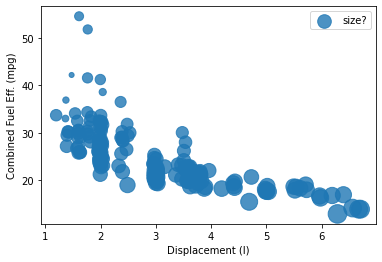

In [14]:
sb.regplot(data=fuel_econ_subset,
           x='displ',
           y='comb',
           x_jitter=0.04,
           fit_reg=False,
           scatter_kws={'s': fuel_econ_subset['co2'] / 2})
# scatter_kws = {'s':    } : make marker size

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

plt.legend(['size?'])

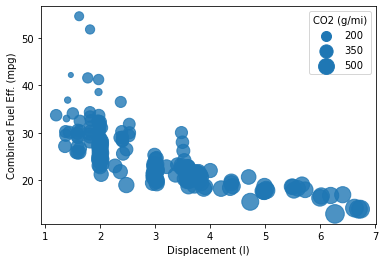

In [15]:
sb.regplot(data=fuel_econ_subset,
           x='displ',
           y='comb',
           x_jitter=0.04,
           fit_reg=False,
           scatter_kws={'s': fuel_econ_subset['co2'] / 2})
# scatter_kws = {'s':    } : make marker size

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# make dummy scatterplot to get the size of shape for values in list.

sizes = [200, 350, 500]
base_color = sb.color_palette()[0]

legend_obj = []  # generate dummy scatter plot object
for s in sizes:
    legend_obj.append(plt.scatter([], [], s=s / 2, color=base_color))
    # only extract maker-size as 's' for 'sizes' in list

plt.legend(
    legend_obj, sizes,
    title='CO2 (g/mi)')  # display the extracted size of shape with title

While the creation of the plot is easier with size, we need to put in extra leg work to create a legend. Since, as noted above, **`legend` will only create one legend entry** per plot function call, we need to create additional `dummy scatter` objects with reference sizes to create the plot. The color is fixed so that all of the legend entries have the same color, and two arguments are provided to the legend function: the list of plotting objects to depict in the legend, and their labels.

## Color

In [16]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]

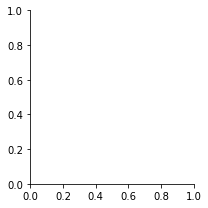

In [17]:
g = sb.FacetGrid(data=fuel_econ_subset, hue='trans_type')

Text(10.050000000000004, 0.5, 'Combined Fuel Eff. (mpg)')

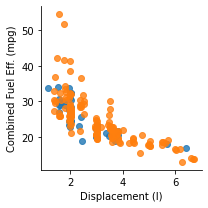

In [18]:
g = sb.FacetGrid(data=fuel_econ_subset, hue='trans_type')
g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

### Qualitative Variable - tran_type

Text(29.784765625000006, 0.5, 'Combined Fuel Eff. (mpg)')

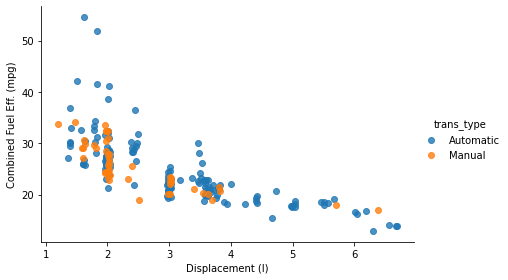

In [19]:
g = sb.FacetGrid(data=fuel_econ_subset,
                 hue='trans_type',
                 hue_order=['Automatic', 'Manual'],
                 height=4,
                 aspect=1.5)  # 'hue order' - change over color
g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)

g.add_legend()  # automatically add the relevant legend to plot

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

### Ordered Variable - VClass

Text(33.703515625, 0.5, 'Combined Fuel Eff. (mpg)')

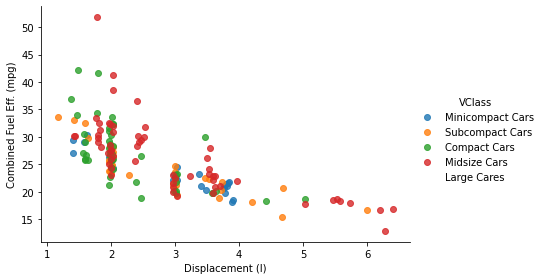

In [20]:
g = sb.FacetGrid(data=fuel_econ_subset, hue='VClass', height=4, aspect=1.5)
g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)

g.add_legend()  # automatically add the relevant legend to plot

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

> This isn't quite distinctive, so we used a **sequential palette** instead.

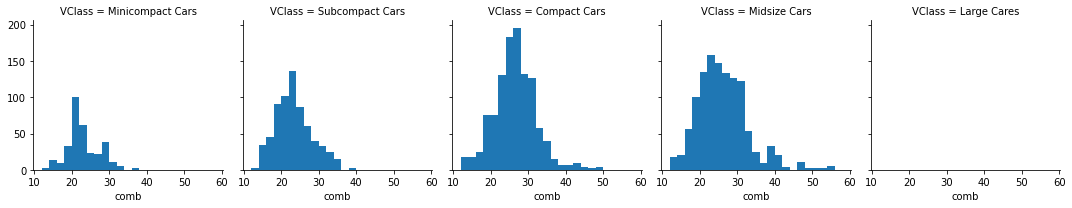

In [21]:
#s

bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, 'comb', bins = bins);

If you have a qualitative variable, you can set different colors for different levels of a categorical variable through the "hue" parameter on seaborn's `FacetGrid` class.

Text(33.703515625, 0.5, 'Combined Fuel Eff. (mpg)')

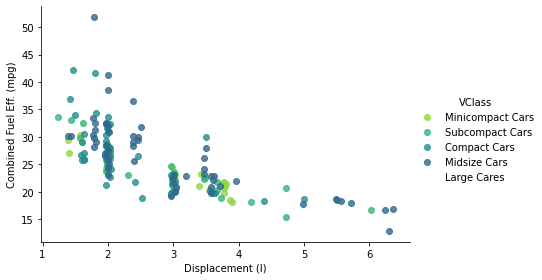

In [22]:
g = sb.FacetGrid(data=fuel_econ_subset,
                 hue='VClass',
                 height=4,
                 aspect=1.5,
                 palette='viridis_r')  # _r : reverse
# good range of hues to further discriminate the categorical variables

g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)

g.add_legend()  # automatically add the relevant legend to plot

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(33.703515625, 0.5, 'Combined Fuel Eff. (mpg)')

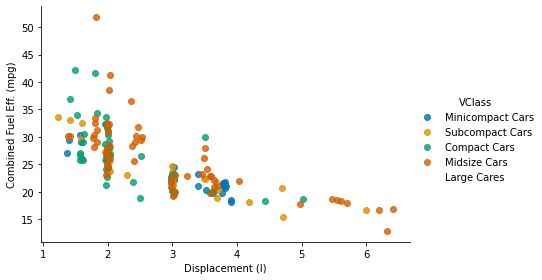

In [23]:
g = sb.FacetGrid(data=fuel_econ_subset,
                 hue='VClass',
                 height=4,
                 aspect=1.5,
                 palette='colorblind')  # colorblind
# good range of hues to further discriminate the categorical variables

g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)

g.add_legend()  # automatically add the relevant legend to plot

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

### Ordered Variable - CO2

FacetGrid is only used when there're `categorical` variable. Use `Scatter` plot instead.

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

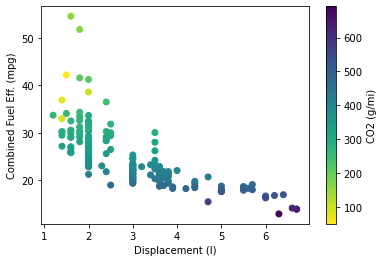

In [24]:
plt.scatter(
    data=fuel_econ_subset,
    x='displ',
    y='comb',
    c='co2',  # c parameter for category (c.f. s for size)
    cmap='viridis_r')  # good range of hue

plt.colorbar(label='CO2 (g/mi)')

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

> fine-tuning color:  https://stackoverflow.com/questions/20144529/shifted-colorbar-matplotlib

### Additional tips

**Qualitative** palettes are built for nominal-type data. This is the palette class taken by the default palette.

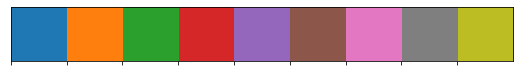

In [25]:
sb.palplot(sb.color_palette(n_colors=9))

 In a **sequential** palette, consecutive color values should follow each other systematically. Typically, this follows a light-to-dark trend across a single or small range of hues, where light colors indicate low values and dark colors indicate high values. The default sequential color map, "viridis", takes the opposite approach, with dark colors indicating low values, and light values indicating high.

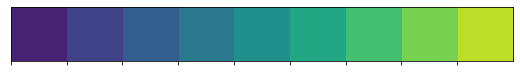

In [26]:
sb.palplot(sb.color_palette('viridis', 9))

If there is a **meaningful zero or center value** for the variable, you may want to consider using a diverging palette. In a diverging palette, two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them. One hue indicates values greater than the center point, while the other indicates values smaller than the center.

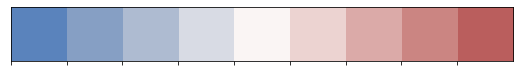

In [27]:
sb.palplot(sb.color_palette('vlag', 9))

---

- **Qualitative** (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
- **Sequential**: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)
- **Diverging**: 'vlag' (blue-white-red), 'icefire' (blue-black-orange)

For all of these strings, appending **'_r'** reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

https://matplotlib.org/stable/api/pyplot_summary.html

## Faceting

In [28]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [ ]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.scatter, 'displ', 'comb');

In [ ]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type', 
                margin_titles = True)  # margin_titles: align Grids
g.map(plt.scatter, 'displ', 'comb');

In [ ]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type', 
                margin_titles = True)  # margin_titles: align Grids
g.map(sb.boxplot, 'year', 'co2');

## Other Adaptations of Bivariate Plots

### Pointplot

In [ ]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd', linestyles = "");
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined efficiency (mpg)');

In [ ]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb',
             hue = 'trans_type',
             ci = 'sd', linestyles = "");
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined efficiency (mpg)');

In [ ]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb',
             hue = 'trans_type',
             ci = 'sd', linestyles = "",
             dodge = True); # off slightly
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined efficiency (mpg)');

### Clustered Bar Chart

In [ ]:
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb',
             hue = 'trans_type',
             ci = 'sd');
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined efficiency (mpg)');

### Clustered Box plot

In [ ]:
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb',
           hue = 'trans_type')
             
plt.xticks(rotation = 15)
plt.ylabel('Avg. combined efficiency (mpg)');

### Heatmap

In [ ]:
bins_x = np.arange(0.6, 7.0 + 0.3, 0.3)
bins_y = np.arange(12, 58 + 3, 3)

plt.hist2d(x = fuel_econ['displ'], y= fuel_econ['comb'], cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y]);  # 색상반전

plt.colorbar()
plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

**Set colorbar as co2**

1. Figure out in which bin, each point falls
2. Count up the number of points that fall in each bin
3. CO2 emissions divided by the number of cars in its bin, equal to the average CO2 emissio. (CO2 per a Car)

In [ ]:
fuel_econ['displ']

In [ ]:
bins_x

In [ ]:
# Figure out in which bin, each point falls

pd.cut(fuel_econ['displ'], bins_x, right = False, include_lowest = False)

In [ ]:
# Figure out in which bin, each point falls

pd.cut(fuel_econ['displ'], bins_x, right = False, include_lowest = False, 
      labels = False).astype(int)   # Min + Max and round up

In [ ]:
displ_bins = pd.cut(fuel_econ['displ'],
                    bins_x,
                    right=False,
                    include_lowest=False,
                    labels=False).astype(int)  # Min + Max and round up

comb_bins = pd.cut(fuel_econ['comb'],
                   bins_y,
                   right=False,
                   include_lowest=False,
                   labels=False).astype(int)  # Min + Max and round up


# Count up the number of points that fall in each bin

n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points 

In [ ]:
n_points = n_points.reset_index() # Array => DataFrame 
n_points

In [ ]:
n_points = n_points.pivot(index = 'displ', columns = 'comb').values  # DataFrame => Array
n_points

In [ ]:
n_points[displ_bins, comb_bins]

In [ ]:
fuel_econ['co2']

In [ ]:
co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]
co2_weights 

In [ ]:
bins_x = np.arange(0.6, 7.0 + 0.3, 0.3)
bins_y = np.arange(12, 58 + 3, 3)

# If we want to depict the mean of a third variable in a 2-d histogram, 
# we need to change the weights of points in the hist2d function 
# similar to how we changed the weights in the 1-d histogram.

plt.hist2d(x = fuel_econ['displ'], y= fuel_econ['comb'], cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y], weights = co2_weights);  # co2_weight

plt.colorbar(label = 'CO2 (g/mi)');

plt.xlabel('Displacement(l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

## Additional Plot

### Plot Matrix

If you `look at pairwise visualizations before putting together a trivariate plot`, then you will have a **clear view to how the interaction**, if present, changes your previous understanding of the marginal pairwise relationship.

In [ ]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head()

In [ ]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data = pokemon, vars = pkmn_stats);
g.map(plt.scatter);

In [ ]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data = pokemon, vars = pkmn_stats);
g = g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

In [ ]:
pokemon[pkmn_stats].corr()   # correlation

In [ ]:
sb.heatmap(pokemon[pkmn_stats].corr())   # correlation

In [ ]:
sb.heatmap(pokemon[pkmn_stats].corr(), annot = True); 

In [ ]:
sb.heatmap(pokemon[pkmn_stats].corr(),
           cmap = 'rocket_r',  # reverse color
           annot = True,       # add values in boxes
           fmt = '.2f',        # two digits
           vmin = 0);          # set lower bound of colormap as zero

- **Defense vs Speed** has (-) correlation, while all other pairs have positive correlation.
- **Defense vs Special-defense** has a strong correlation. Check if it has any outlier from the `scatter plot`.

In [ ]:
# pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
# g = sb.PairGrid(data = pokemon, vars = pkmn_stats);
# g.map(sb.violinplot);

### Feature Engineering (option)

 As you explore a dataset, you might find that two variables are related in some way. Feature engineering is all about creating a new variable with a `sum`, `difference`, `product`, or `ratio` between those original variables that may lend a better insight into the research questions you seek to answer.

For example, if you have one variable that gives a **count of crime incidents, and a second one that gives population totals**, then you may want to engineer a new variable by dividing the former by the latter, obtaining an incident rate. This would account for a possible relationship between the original features where if there are more people, there might naturally be more chances for crimes to occur. If we looked at the raw counts rather than the incident rate, we risk just seeing information about population sizes rather than what we might really want.

In [ ]:
pokemon['atk_ratio'] = pokemon['attack'] / pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense'] / pokemon['special-defense']

> if, ratio > 0, physically biased. 

> if, ratio < 0, specially biased. 

In [ ]:
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio', alpha = 1/3)

plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)')

In [ ]:
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio', alpha = 1/3)

plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)')

plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio', alpha = 1/3)

plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)')

plt.xscale('log')
plt.yscale('log')

tick_loc = [0.25, 0.5, 1, 2, 4]

plt.xticks(tick_loc, tick_loc);
plt.yticks(tick_loc, tick_loc);

In [ ]:
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio', alpha = 1/3)

plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)')

plt.xscale('log')
plt.yscale('log')

tick_loc = [0.25, 0.5, 1, 2, 4]

plt.xticks(tick_loc, tick_loc);
plt.yticks(tick_loc, tick_loc);

plt.xlim(2 ** -2.5, 2 ** 2.5)
plt.ylim(2 ** -2.5, 2 ** 2.5);   # remove outliers

Interesting;y, there appears to be a large number of Pokemon on the Y equals 1 line showing **no defensive bias**, but these pokemons have **a wide range of offensive biases**. 